In [2]:
import sys
sys.path.append('/home/painchess/clean_merger_rate')
from simulation import *
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import os
from matplotlib import ticker

In [11]:
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

In [6]:
sim_names = ['M25S07', 'M25S08', 'M25S09', 'M03S07', 'M03S08', 'M03S09', 'M35S07', 'M35S08', 'M35S09',
                 'Illustris', 'BolshoiP', 'Bolshoi', 'M03S08b', 'm25s85', 'm2s8', 'm4s7', 'm4s8', 'm2s9',
                 'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s85', 'm2s7', 'm25s8',
                 'm35s8', 'm25s9', 'm35s85', 'm3s75', 'm35s9', 'm35s7']
omegas = [0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.309, 0.307, 0.27, 0.3, 0.25, 0.2, 0.4, 0.4, 0.2, 0.3
    , 0.3, 0.35, 0.4, 0.3, 0.25, 0.2, 0.3, 0.3, 0.2, 0.25, 0.35, 0.25, 0.35, 0.3, 0.35, 0.35]
sigmas = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.816, 0.82, 0.82, 0.8, 0.85, 0.8, 0.7, 0.8, 0.9, 0.8
    , 0.8, 0.75, 0.9, 0.9, 0.75, 1.0, 0.7, 0.85, 0.7, 0.8, 0.8, 0.9, 0.85, 0.75, 0.9, 0.7]

sims = dict(zip(sim_names, list(zip(omegas, sigmas))))

In [7]:
save = False
diff = True
corr = True
folder1 = '/home/painchess/disq2/formation_time_data/'

In [19]:
if diff:
    #simulations = ['diff_m25s7', 'diff_m25s8', 'diff_m25s9']
    simulations = ['diff_Illustris', 'diff_M03S08','diff_BolshoiP', 'diff_Bolshoi']
else:
    #simulations = ['m25s7', 'm25s8', 'm25s9']
    simulations = ['Illustris', 'M03S08', 'BolshoiP', 'Bolshoi']

In [21]:
Mmins = [1e12, 1e13, 1e14]
# Mmins = [1e12, 1e13, 1e14]
Mmaxs = [3e12, 3e13, 3e14]
lens = len(simulations)
lenm = len(Mmins)
types = ['low']
zx = '0.5'
res2, res3, res4 = [], [], []
cumsum2, cumsum3, cumsum4 = [], [], []
poisson2, poisson3, poisson4 = [], [], [] 

## Get weighted averages of masses 

In [27]:
for i in range(len(simulations)):
    if diff:
        name = simulations[i][5:]
    else:
        name = simulations[i]
    s8 = sims[name][1]
    #s8 = 0.8
    om0 = sims[name][0]
    histmass2 = np.loadtxt(folder1+'{}_{:2.1e}_{:2.1e}_histmass.txt'.format(simulations[i], Mmins[0], Mmaxs[0]))
    histmass3 = np.loadtxt(folder1+'{}_{:2.1e}_{:2.1e}_histmass.txt'.format(simulations[i], Mmins[1], Mmaxs[1]))
    histmass4 = np.loadtxt(folder1+'{}_{:2.1e}_{:2.1e}_histmass.txt'.format(simulations[i], Mmins[2], Mmaxs[2]))
    
    masses2, weights2 = histmass2
    masses3, weights3 = histmass3
    masses4, weights4 = histmass4
    
    if corr:
        zf = np.linspace(0.05, 3, 100)
    else:
        zf = np.linspace(0.01, 3, 100)
    dz = zf[1] - zf[0]
    if save:
        res2.append(M_integ_proba(masses2, weights2, frac=zx, acc=100000, model='EC', zf=zf, zi=zf[0]-0.01, colos=True, ol0=1 - om0, om0=om0, omb=0.0486,
                             sig8=s8, h=0.7, diff=diff))
        res3.append(M_integ_proba(masses3, weights3, frac=zx, acc=100000, model='EC', zf=zf, zi=zf[0]-0.01, colos=True, ol0=1 - om0, om0=om0, omb=0.0486,
                             sig8=s8, h=0.7, diff=diff))
        res4.append(M_integ_proba(masses4, weights4, frac=zx, acc=100000, model='EC', zf=zf, zi=zf[0]-0.01, colos=True, ol0=1 - om0, om0=om0, omb=0.0486,
                             sig8=s8, h=0.7, diff=diff))
    else:
        if diff:
            if corr:
                res2 = np.loadtxt('./data/res2_dpdz_corr_{}_{}.txt'.format(Mmins[0], Mmaxs[0]))
                res3 = np.loadtxt('./data/res3_dpdz_corr_{}_{}.txt'.format(Mmins[1], Mmaxs[1]))
                res4 = np.loadtxt('./data/res4_dpdz_corr_{}_{}.txt'.format(Mmins[2], Mmaxs[2]))
            else:
                res2 = np.loadtxt('./data/res2_dpdz_{}_{}.txt'.format(Mmins[0], Mmaxs[0]))
                res3 = np.loadtxt('./data/res3_dpdz_{}_{}.txt'.format(Mmins[1], Mmaxs[1]))
                res4 = np.loadtxt('./data/res4_dpdz_{}_{}.txt'.format(Mmins[2], Mmaxs[2]))
        else:
            if corr:
                res2 = np.loadtxt('./data/res2_z50_corr_{}_{}.txt'.format(Mmins[0], Mmaxs[0]))
                res3 = np.loadtxt('./data/res3_z50_corr_{}_{}.txt'.format(Mmins[1], Mmaxs[1]))
                res4 = np.loadtxt('./data/res4_z50_corr_{}_{}.txt'.format(Mmins[2], Mmaxs[2]))
            else:
                res2 = np.loadtxt('./data/res2_z50_{}_{}.txt'.format(Mmins[0], Mmaxs[0]))
                res3 = np.loadtxt('./data/res3_z50_{}_{}.txt'.format(Mmins[1], Mmaxs[1]))
                res4 = np.loadtxt('./data/res4_z50_{}_{}.txt'.format(Mmins[2], Mmaxs[2]))

    for typ in types:
        if corr:
            cumsum2.append(np.loadtxt(folder1+'c{}_cum_histo_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[0], Mmaxs[0])))
            cumsum3.append(np.loadtxt(folder1+'c{}_cum_histo_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[1], Mmaxs[1])))
            cumsum4.append(np.loadtxt(folder1+'c{}_cum_histo_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[2], Mmaxs[2])))
            poisson2.append(np.loadtxt(folder1 + 'c{}_poisson_errors_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[0], Mmaxs[0])))
            poisson3.append(np.loadtxt(folder1 + 'c{}_poisson_errors_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[1], Mmaxs[1])))
            poisson4.append(np.loadtxt(folder1 + 'c{}_poisson_errors_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[2], Mmaxs[2])))

        else:
            cumsum2.append(np.loadtxt(folder1+'{}_cum_histo_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[0], Mmaxs[0])))
            cumsum3.append(np.loadtxt(folder1+'{}_cum_histo_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[1], Mmaxs[1])))
            cumsum4.append(np.loadtxt(folder1+'{}_cum_histo_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[2], Mmaxs[2])))
            poisson2.append(np.loadtxt(folder1+'{}_poisson_errors_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[0], Mmaxs[0])))
            poisson3.append(np.loadtxt(folder1+'{}_poisson_errors_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[1], Mmaxs[1])))
            poisson4.append(np.loadtxt(folder1+'{}_poisson_errors_{:2.1e}_{:2.1e}.txt'.format(simulations[i], Mmins[2], Mmaxs[2])))
if save:
    if diff:
        if corr:
            np.savetxt('./data/res2_dpdz_corr_{}_{}.txt'.format(Mmins[0], Mmaxs[0]), np.array(res2))
            np.savetxt('./data/res3_dpdz_corr_{}_{}.txt'.format(Mmins[1], Mmaxs[1]), np.array(res3))
            np.savetxt('./data/res4_dpdz_corr_{}_{}.txt'.format(Mmins[2], Mmaxs[2]), np.array(res4))
        else:
            np.savetxt('./data/res2_dpdz_{}_{}.txt'.format(Mmins[0], Mmaxs[0]), np.array(res2))
            np.savetxt('./data/res3_dpdz_{}_{}.txt'.format(Mmins[1], Mmaxs[1]), np.array(res3))
            np.savetxt('./data/res4_dpdz_{}_{}.txt'.format(Mmins[2], Mmaxs[2]), np.array(res4))
    else:
        if corr:
            np.savetxt('./data/res2_z50_corr_{}_{}.txt'.format(Mmins[0], Mmaxs[0]), np.array(res2))
            np.savetxt('./data/res3_z50_corr_{}_{}.txt'.format(Mmins[1], Mmaxs[1]), np.array(res3))
            np.savetxt('./data/res4_z50_corr_{}_{}.txt'.format(Mmins[2], Mmaxs[2]), np.array(res4))
        else:
            np.savetxt('./data/res2_z50_{}_{}.txt'.format(Mmins[0], Mmaxs[0]), np.array(res2))
            np.savetxt('./data/res3_z50_{}_{}.txt'.format(Mmins[1], Mmaxs[1]), np.array(res3))
            np.savetxt('./data/res4_z50_{}_{}.txt'.format(Mmins[2], Mmaxs[2]), np.array(res4))

## Make the plots

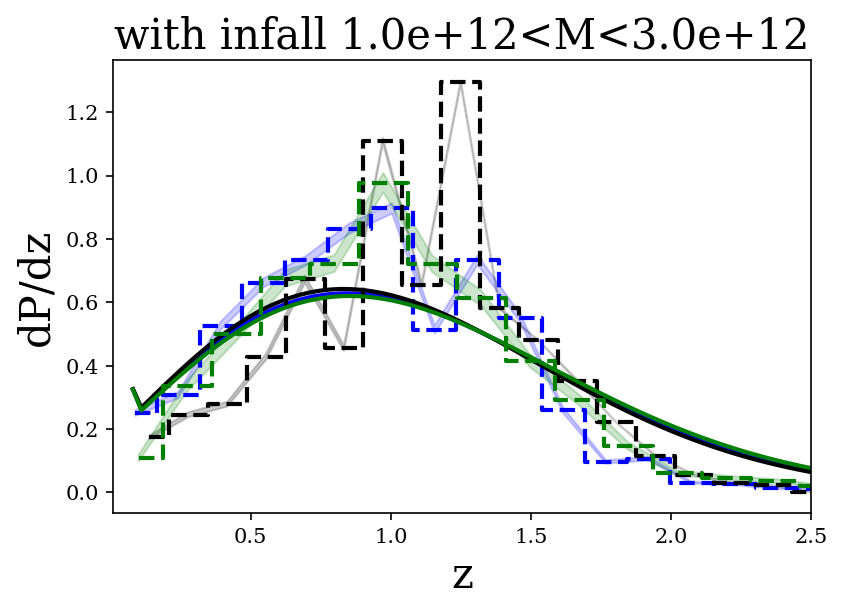

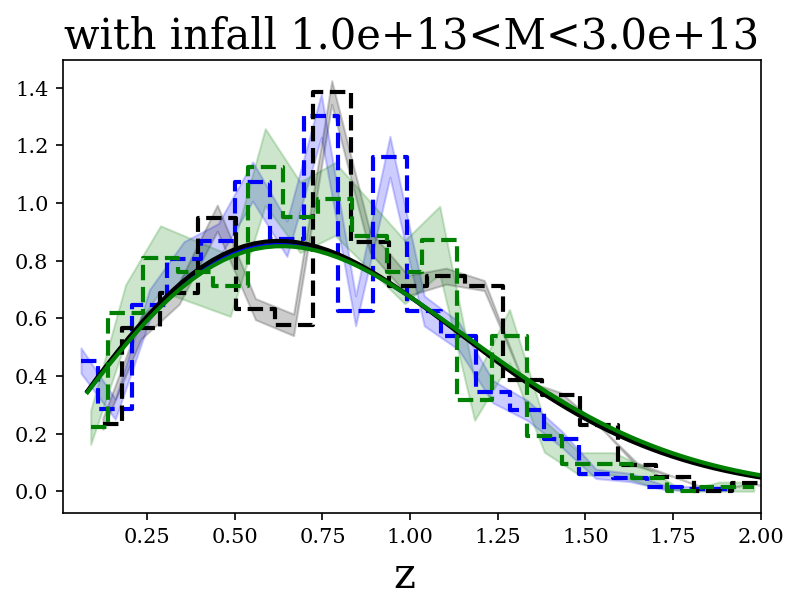

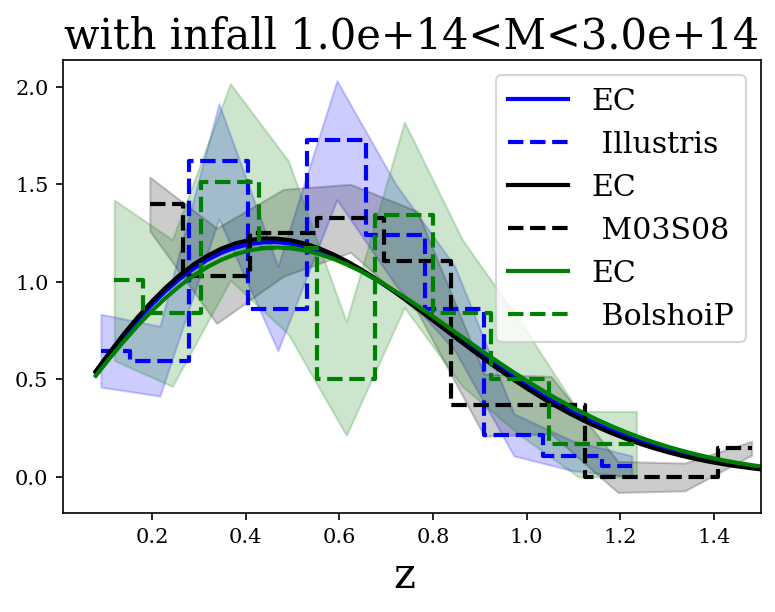

In [28]:
colors = ['blue', 'black', 'green']
plt.figure()
for i in range(lenm):
    if diff:
        plt.plot(zf[1:-1], res2[i], label='EC', color=colors[i], linewidth=2)
        plt.plot(cumsum2[i][0], cumsum2[i][1], linestyle='--', drawstyle='steps-mid', label=' {}'.format(simulations[i][5:]),
                 color=colors[i], linewidth=2)
        plt.fill_between(cumsum2[i][0], cumsum2[i][1] - poisson2[i],cumsum2[i][1] + poisson2[i],  color=colors[i],alpha=0.2)

        # plt.errorbar(cumsum2[i][0], cumsum2[i][1], linestyle='--', yerr=poisson2[i], label=' {}'.format(simulations[i][5:]),
        #      color=colors[i], drawstyle='steps-mid', linewidth=2)
    else:
        plt.plot(zf, res2[i], label='EC', color=colors[i], linewidth=2)
        #plt.errorbar(cumsum2[i][0], cumsum2[i][1], linestyle='--', yerr=poisson2[i], label=' {}'.format(simulations[i]),
                     #color=colors[i], linewidth=2)
        plt.plot(cumsum2[i][0], cumsum2[i][1], linestyle='--', alpha=0.7, label=' {}'.format(simulations[i]),
                 color=colors[i], linewidth=2)
        plt.fill_between(cumsum2[i][0], cumsum2[i][1] - poisson2[i],cumsum2[i][1] + poisson2[i],  color=colors[i],alpha=0.2)
plt.xlabel('z', size=20)
plt.xlim(0.01, 2.5)
#plt.ylim(0, 3)
if diff:
    plt.ylabel('dP/dz', size=20)
else:
    plt.ylabel('P($Z_{50} > z$)', size=20)
#plt.legend()
if corr:
    plt.title('with infall {:2.1e}<M<{:2.1e}'.format(Mmins[0], Mmaxs[0]), size=20)
    if diff:
        plt.savefig('./figs/dpdz_corr_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[0], Mmaxs[0]), dpi=600, bbox_inches='tight')
    else:
        plt.savefig('./figs/z50_corr_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[0], Mmaxs[0]), dpi=600, bbox_inches='tight')
else:
    plt.title('{:2.1e}<M<{:2.1e}'.format(Mmins[0], Mmaxs[0]), size=20)
    if diff:
        plt.savefig('./figs/dpdz_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[0], Mmaxs[0]), dpi=600, bbox_inches='tight')
    else:
        plt.savefig('./figs/z50_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[0], Mmaxs[0]), dpi=600, bbox_inches='tight')
plt.show()



plt.figure()
for i in range(lenm):
    if diff:
        plt.plot(zf[1:-1], res3[i], label='EC', color=colors[i], linewidth=2)
        plt.plot(cumsum3[i][0], cumsum3[i][1], linestyle='--', drawstyle='steps-mid',
                 label=' {}'.format(simulations[i][5:]), color=colors[i], linewidth=2)
        plt.fill_between(cumsum3[i][0], cumsum3[i][1] - poisson3[i],cumsum3[i][1] + poisson3[i], color=colors[i], alpha=0.2)
    else:
        plt.plot(zf, res3[i], label='EC', color=colors[i], linewidth=2)
        plt.plot(cumsum3[i][0], cumsum3[i][1], linestyle='--', alpha=0.7, label=' {}'.format(simulations[i][:]),
                 color=colors[i], linewidth=2)

        plt.fill_between(cumsum3[i][0], cumsum3[i][1] - poisson3[i],cumsum3[i][1] + poisson3[i], color=colors[i], alpha=0.2)
plt.xlabel('z ', size=20)
plt.xlim(0.01, 2)

if corr:
    plt.title('with infall {:2.1e}<M<{:2.1e}'.format(Mmins[1], Mmaxs[1]), size=20)
    if diff:
        plt.savefig('./figs/dpdz_corr_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[1], Mmaxs[1]), dpi=600, bbox_inches='tight')
    else:
        plt.savefig('./figs/z50_corr_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[1], Mmaxs[1]), dpi=600, bbox_inches='tight')
else:
    plt.title('{:2.1e}<M<{:2.1e}'.format(Mmins[1], Mmaxs[1]), size=20)
    if diff:
        plt.savefig('./figs/dpdz_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[1], Mmaxs[1]), dpi=600, bbox_inches='tight')
    else:
        plt.savefig('./figs/z50_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[1], Mmaxs[1]), dpi=600, bbox_inches='tight')
plt.show()

plt.figure()
for i in range(lenm):
    if diff:
        plt.plot(zf[1:-1], res4[i], label='EC', color=colors[i], linewidth=2)
        plt.plot(cumsum4[i][0], cumsum4[i][1], linestyle='--', drawstyle='steps-mid',
                 label=' {}'.format(simulations[i][5:]), color=colors[i], linewidth=2)
        plt.fill_between(cumsum4[i][0], cumsum4[i][1] - poisson4[i],cumsum4[i][1] + poisson4[i],  color=colors[i],alpha=0.2)

        # plt.errorbar(cumsum4[i][0], cumsum4[i][1], linestyle='--', yerr=poisson4[i],drawstyle='steps-mid',
        #              label=' {} '.format(simulations[i][5:]), color=colors[i], linewidth=2)
    else:
        plt.plot(zf, res4[i], label='EC', color=colors[i], linewidth=2)
        # plt.errorbar(cumsum4[i][0], cumsum4[i][1], linestyle='--', yerr=poisson4[i],
        #              label=' {} '.format(simulations[i]), color=colors[i], linewidth=2)
        plt.plot(cumsum4[i][0], cumsum4[i][1], linestyle='--', alpha=1, label=' {}'.format(simulations[i]),
                 color=colors[i], linewidth=2)
        plt.fill_between(cumsum4[i][0], cumsum4[i][1] - poisson4[i],cumsum4[i][1] + poisson4[i],  color=colors[i],alpha=0.2)
plt.xlabel('z ', size=20)
plt.xlim(0.01, 1.5)
plt.legend(fontsize='x-large')
# if diff:
#     plt.ylabel('dP/dz', size=20)
# else:
#     plt.ylabel('P($Z_{50} > z$)', size=20)
if corr:
    plt.title('with infall {:2.1e}<M<{:2.1e}'.format(Mmins[2], Mmaxs[2]), size=20)
    if diff:
        plt.savefig('./figs/dpdz_corr_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[2], Mmaxs[2]), dpi=600, bbox_inches='tight')
    else:
        plt.savefig('./figs/z50_corr_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[2], Mmaxs[2]), dpi=600, bbox_inches='tight')
else:
    plt.title('{:2.1e}<M<{:2.1e}'.format(Mmins[2], Mmaxs[2]), size=20)
    if diff:
        plt.savefig('./figs/dpdz_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[2], Mmaxs[2]), dpi=600, bbox_inches='tight')
    else:
        plt.savefig('./figs/z50_{:2.1e}<M<{:2.1e}_bim.pdf'.format(Mmins[2], Mmaxs[2]), dpi=600, bbox_inches='tight')

plt.show()

# Median $z_{50}$ vs $\Omega_m$ and $\sigma_8$

## Vs $\sigma_8$

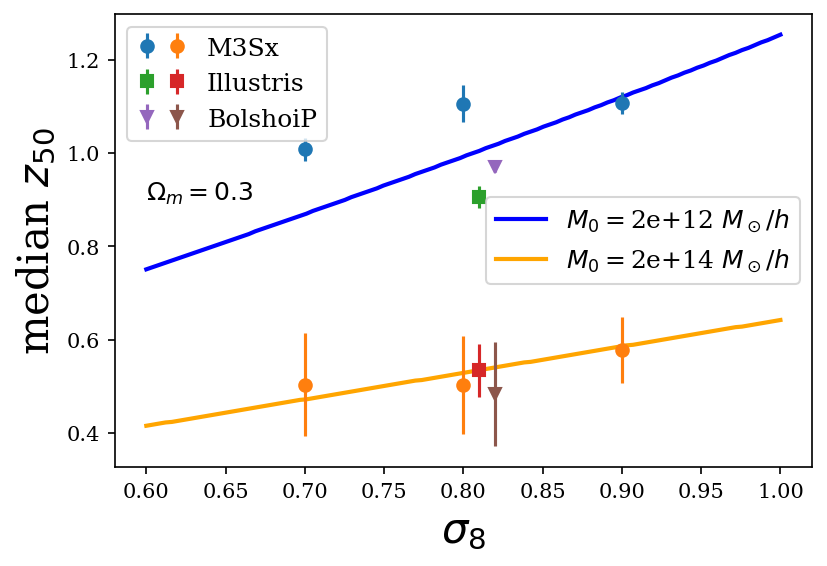

In [12]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
masses = [2e12, 2e14]
m1 = np.loadtxt(folder1+'/m3sx_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e12, 3e12))
m2 = np.loadtxt(folder1+'/m3sx_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e13, 3e13))
m3 = np.loadtxt(folder1+'/m3sx_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e14, 3e14))

bim1 = np.loadtxt(folder1+'/bim_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e12, 3e12))
bim2 = np.loadtxt(folder1+'/bim_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e13, 3e13))
bim3 = np.loadtxt(folder1+'/bim_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e14, 3e14))

omegas = np.linspace(0.15, 0.55, 100)
sigmas = np.linspace(0.6, 1, 100)

yerrors = m1[2,:]
xpoints = [0.7, 0.8, 0.9]
ypoints = m1[0,:]
yerrors2 = m2[2,:]
ypoints2 = m2[0,:]
yerrors3 = m3[2,:]
ypoints3 = m3[0,:]
byerrors = bim1[2,:]
bypoints = bim1[0,:]
byerrors2 = bim2[2,:]
bypoints2 = bim2[0,:]
byerrors3 = bim3[2,:]
bypoints3 = bim3[0,:]
colors = ['blue', 'orange', 'green']
save = False
for i in range(2):
    if save:
        res2 = [median_formation(masses[i], 0.05, acc=100, nzeds=5000, prec=100, frac=0.5, sig8=el, om0=0.3, ol0=0.7, model='EC', colos=True, outc=False) for el in sigmas]
        np.savetxt('./data/median_z50_sigs_{:2.1e}.txt'.format(masses[i]), res2)
    else:
        res2 = np.loadtxt('./data/median_z50_sigs_{:2.1e}.txt'.format(masses[i]))
    plt.plot(sigmas, res2, color = colors[i], linewidth=2, label='$M_0=${:g} $M_\odot/h$'.format(masses[i]))
m1 = plt.errorbar(xpoints, ypoints, yerr=yerrors, fmt='o')
m2 = plt.errorbar(xpoints, ypoints3, yerr=yerrors3, fmt='o')

i1 = plt.errorbar(0.81, bypoints[0], yerr=byerrors[0], fmt='s')
i2 = plt.errorbar(0.81, bypoints3[0], yerr=byerrors3[0], fmt='s')

b1 = plt.errorbar(0.82, bypoints[1], yerr=byerrors[1], fmt='v')
b2 = plt.errorbar(0.82, bypoints3[1], yerr=byerrors3[1], fmt='v')
plt.annotate(r'$\Omega_m=0.3$', (0.6,0.9), size=12)

plt.xlabel('$\sigma_8$', size=20)
plt.ylabel('median $z_{50}$', size=20)

first_legend = plt.legend(loc='right')
plt.gca().add_artist(first_legend)

m = plt.legend([(m1, m2), (i1, i2), (b1, b2)], ['M3Sx', 'Illustris', 'BolshoiP'], numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)}, loc='best')
plt.show()

## Vs $\Omega_m$

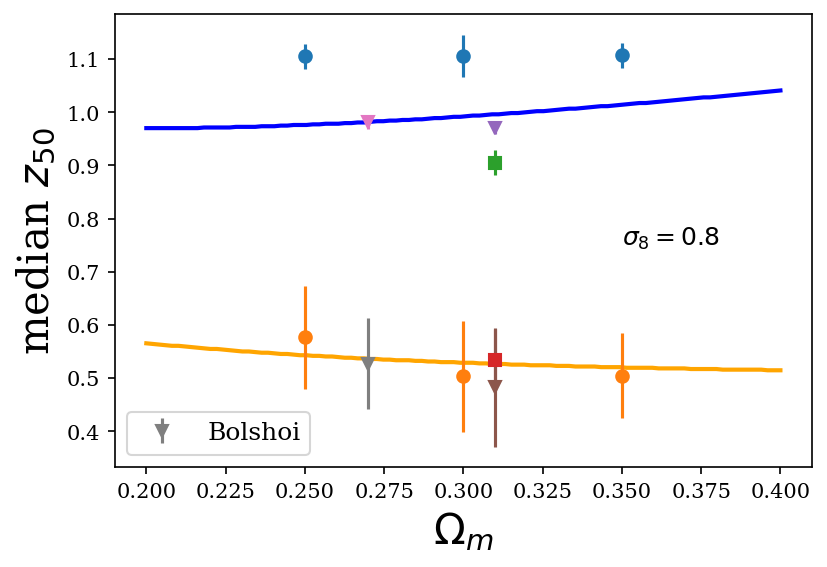

In [17]:

masses = [2e12, 2e14, 5e15]

m1 = np.loadtxt(folder1+'/mxs8_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e12, 3e12))
m2 = np.loadtxt(folder1+'/mxs8_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e14, 3e14))
bim1 = np.loadtxt(folder1+'/bim_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e12, 3e12))
bim2 = np.loadtxt(folder1+'/bim_mean_std_{:2.1e}_{:2.1e}.txt'.format(1e14, 3e14))

omegas = np.linspace(0.2, 0.4, 100)
sigmas = np.linspace(0.6, 1, 100)

yerrors = m1[2,:]

xpoints = [0.25, 0.3, 0.35]
ypoints = m1[0,:]
yerrors2 = m2[2,:]
ypoints2 = m2[0,:]

byerrors = bim1[2,:]
bypoints = bim1[0,:]
byerrors2 = bim2[2,:]
bypoints2 = bim2[0,:]
colors = ['blue', 'orange', 'green']
save = False
for i in range(2):
    if save:
        res = [median_formation(masses[i], 0.05, acc=100, nzeds=5000, prec=100, frac=0.5, sig8=0.8, om0=el, ol0=1-el, model='EC', colos=True, outc=False) for el in omegas]
        np.savetxt('./data/median_z50_omgs_{:2.1e}.txt'.format(masses[i]), res)
    else:
        res = np.loadtxt('./data/median_z50_omgs_{:2.1e}.txt'.format(masses[i]))
    plt.plot(omegas, res, color = colors[i], linewidth=2) #, label= 'M={:g} $M_\odot/h$'.format(masses[i]))

plt.errorbar(xpoints, ypoints, yerr=yerrors, fmt='o', label='MxS8')
plt.errorbar(xpoints, ypoints2, yerr=yerrors2, fmt='o') #, label='$\sigma_8 = 0.8$ 1e14<M<3e14')

plt.errorbar(0.31, bypoints[0], yerr=byerrors[0], fmt='s')#,   label='Illustris ')
plt.errorbar(0.31, bypoints2[0], yerr=byerrors2[0], fmt='s')#,  label='Illustris ')

plt.errorbar(0.31, bypoints[1], yerr=byerrors[1], fmt='v')#,  label='BolshoiP')
plt.errorbar(0.31, bypoints2[1], yerr=byerrors2[1], fmt='v')#, label='BolshoiP')

b1 = plt.errorbar(0.27, bypoints[3], yerr=byerrors[3], fmt='v')#,  label='Bolshoi')
b2 = plt.errorbar(0.27, bypoints2[3], yerr=byerrors2[3], fmt='v')#, label='Bolshoi')
plt.annotate(r'$\sigma_8=0.8$', (0.35,0.75), size=12)

plt.xlabel('$\Omega_m$', size=20)
plt.ylabel('median $z_{50}$', size=20)

m = plt.legend([(b2)], ['Bolshoi'], numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)}, loc='best')

plt.savefig('./figs/med_z50_omgs_sims_cluster.pdf', dpi=300, bbox_inches ='tight', facecolor='white')
plt.show()